In [1313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Aim

The aim is to build a machine learning model for similar style players.

In [1314]:
old_data = pd.read_csv('whoscored_data.csv')

In [1315]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play
0,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists...,Strengths,Weaknesses,Style of Play
1,Kristi Vangjeli-current,0.0,0.0,0.17,0.0,0.7,72.3,7.32,4.7,2.8,...,0.2,1.3,0,0.5,0,0.2,DR (Defender Right)-6-0-0-7.32,Undefined,Undefined,Undefined
2,Bajram Jashanica-current,0.0,0.0,0.42,0.0,0.6,74.3,7.27,4,3.6,...,0,4.6,0,0,0,0.6,DC (Defender Centre)-5-0-0-7.27,Undefined,Undefined,Undefined
3,James Adeniyi-current,0.21,0.0,0.21,0.0,1,75.5,6.81,1.2,0.6,...,0,0.2,0.2,0,0.2,0.8,FWL (Forward Left)-3-1-0-7.06/MC (Midfielder C...,Undefined,Undefined,Undefined
4,Gledi Mici-current,0.0,0.0,0.52,0.0,0.3,75.1,6.77,3,2.2,...,0.5,2,0,0.3,0,0,DL (Defender Left)-6-0-0-6.77,Undefined,Undefined,Undefined


In [1316]:
len(old_data)

17913

In [1317]:
old_data.drop([0], inplace=True)

In [1318]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play
1,Kristi Vangjeli-current,0.0,0.0,0.17,0.0,0.7,72.3,7.32,4.7,2.8,...,0.2,1.3,0,0.5,0,0.2,DR (Defender Right)-6-0-0-7.32,Undefined,Undefined,Undefined
2,Bajram Jashanica-current,0.0,0.0,0.42,0.0,0.6,74.3,7.27,4,3.6,...,0,4.6,0,0,0,0.6,DC (Defender Centre)-5-0-0-7.27,Undefined,Undefined,Undefined
3,James Adeniyi-current,0.21,0.0,0.21,0.0,1,75.5,6.81,1.2,0.6,...,0,0.2,0.2,0,0.2,0.8,FWL (Forward Left)-3-1-0-7.06/MC (Midfielder C...,Undefined,Undefined,Undefined
4,Gledi Mici-current,0.0,0.0,0.52,0.0,0.3,75.1,6.77,3,2.2,...,0.5,2,0,0.3,0,0,DL (Defender Left)-6-0-0-6.77,Undefined,Undefined,Undefined
5,Marko Radas-current,0.0,0.0,0.59,0.0,1,80.9,6.74,1.8,1.3,...,0.5,5,0,0.8,0,0.3,DC (Defender Centre)-4-0-0-6.74,Undefined,Undefined,Undefined


In [1319]:
old_data.replace('Undefined', np.nan, inplace=True)

In [1320]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 1 to 17912
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Player Name                                             15261 non-null  object
 1   Goals/90min                                             5482 non-null   object
 2   Assists/90min                                           5482 non-null   object
 3   Yel/90min                                               5482 non-null   object
 4   Red/90min                                               5482 non-null   object
 5   SpG                                                     5482 non-null   object
 6   PS%                                                     5482 non-null   object
 7   Rating                                                  15261 non-null  object
 8   Tackles                                       

In [1321]:
data_null = old_data.isna().mean().round(4)*100

data_null.sort_values(ascending=False).head(30)

OutOfBox                                                  70.20
SixYardBox                                                70.20
PenaltyArea                                               70.20
ThrB                                                      69.85
LongB                                                     69.85
Crosses                                                   69.85
AvgP                                                      69.85
KeyP                                                      69.85
Disp (off)                                                69.85
Off (off)                                                 69.85
Fouled (off)                                              69.85
DrB (off)                                                 69.85
Offsides                                                  69.81
DrB (def)                                                 69.81
Blocks                                                    69.81
Fouls (def)                             

In [1322]:
old_data.dropna(inplace=True)

In [1323]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play
36,Charalampos Lykogiannis-current,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,0.5,0.6,0,0.5,0,0.1,DML (Defensive Midfielder Left)-5-0-1-6.42/DL ...,Aerial Duels-Very Strong/Key passes-Strong/Tac...,Holding on to the ball-Very Weak/Passing-Very ...,Likes to cross-Commits fouls often
368,Victor Luis-current,0.0,0.0,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,0.4,1.6,0,0.6,0,0.2,DL (Defender Left)-4-0-0-6.7/Sub (Substitute)-...,Concentration-Strong/Blocking the ball-Strong,(Player has no significant weaknesses),Likes to shoot from distance-Likes to cross
374,Leonardo Gomes-current,0.0,0.0,0.0,0.0,1,87.8,7.44,3.5,2.5,...,0,1.5,0,0.5,0,0.5,DR (Defender Right)-2-0-0-7.44,Crossing-Strong/Holding on to the ball-Strong/...,(Player has no significant weaknesses),Likes to play short passes
381,Angel Romero-current,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,0.7,0.2,0,0.8,0,0.7,AMR (Attacking Midfielder Right)-4-0-2-7.4/AML...,Aerial Duels-Strong/Through balls-Strong/Defen...,Discipline-Weak,Gets fouled often-Likes to play short passes-L...
384,Rene Junior-current,0.0,0.0,0.0,0.0,0.5,86.9,7.19,4,2,...,0,1,0,0.5,0,0,DMC (Defensive Midfielder (C))-2-0-0-7.19,Tackling-Very Strong/Aerial Duels-Strong,(Player has no significant weaknesses),Likes to dribble-Indirect set-piece threat-Lik...


In [1324]:
len(old_data)

4154

In [1325]:
old_data.columns

Index(['Player Name', 'Goals/90min', 'Assists/90min', 'Yel/90min', 'Red/90min',
       'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides',
       'Clear', 'DrB (def)', 'Blocks', 'DrB (off)', 'Fouled (off)',
       'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB',
       'OutOfBox', 'SixYardBox', 'PenaltyArea',
       'Playing Positions (Position-Apps-Goals-Assists-Rating)', 'Strengths',
       'Weaknesses', 'Style of Play'],
      dtype='object')

In [1326]:
old_data['Goals/90min'] = old_data['Goals/90min'].astype(float)

Lets look at the outliers

(4154, 31)

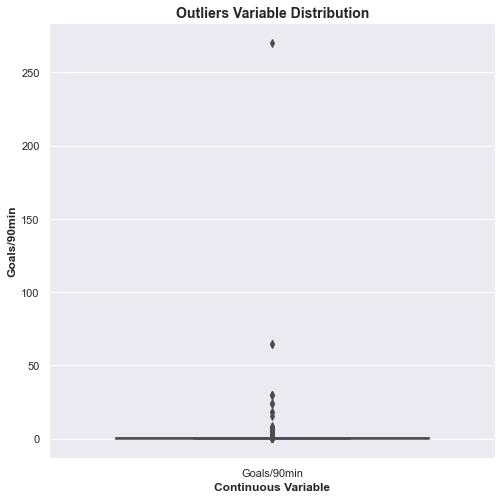

In [1327]:
outliers = ['Goals/90min']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=old_data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Goals/90min", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
old_data.shape

In [1328]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [1329]:
old_data = remove_outliers(old_data, ['Goals/90min'], 2)

Working on column: Goals/90min


(4143, 31)

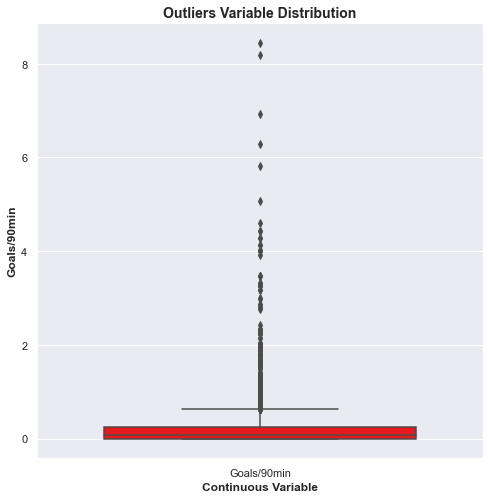

In [1330]:
outliers = ['Goals/90min']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=old_data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Goals/90min", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
old_data.shape

In [1331]:
old_data[old_data['Goals/90min'] == old_data['Goals/90min'].max()]

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play
6026,Tarik Elyounoussi-current,8.44,0.0,0.0,0.0,0.7,89.5,6.12,0.3,0.7,...,0,0,0,0.3,0,0.3,Sub (Substitute)-3-0-0-6.12,Defensive contribution-Strong,Passing-Weak,Likes to play short passes-Likes to tackle-Com...


In [1332]:
old_data.shape

(4143, 31)

In [1333]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play
36,Charalampos Lykogiannis-current,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,0.5,0.6,0,0.5,0,0.1,DML (Defensive Midfielder Left)-5-0-1-6.42/DL ...,Aerial Duels-Very Strong/Key passes-Strong/Tac...,Holding on to the ball-Very Weak/Passing-Very ...,Likes to cross-Commits fouls often
368,Victor Luis-current,0.00,0.0,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,0.4,1.6,0,0.6,0,0.2,DL (Defender Left)-4-0-0-6.7/Sub (Substitute)-...,Concentration-Strong/Blocking the ball-Strong,(Player has no significant weaknesses),Likes to shoot from distance-Likes to cross
374,Leonardo Gomes-current,0.00,0.0,0.0,0.0,1,87.8,7.44,3.5,2.5,...,0,1.5,0,0.5,0,0.5,DR (Defender Right)-2-0-0-7.44,Crossing-Strong/Holding on to the ball-Strong/...,(Player has no significant weaknesses),Likes to play short passes
381,Angel Romero-current,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,0.7,0.2,0,0.8,0,0.7,AMR (Attacking Midfielder Right)-4-0-2-7.4/AML...,Aerial Duels-Strong/Through balls-Strong/Defen...,Discipline-Weak,Gets fouled often-Likes to play short passes-L...
384,Rene Junior-current,0.00,0.0,0.0,0.0,0.5,86.9,7.19,4,2,...,0,1,0,0.5,0,0,DMC (Defensive Midfielder (C))-2-0-0-7.19,Tackling-Very Strong/Aerial Duels-Strong,(Player has no significant weaknesses),Likes to dribble-Indirect set-piece threat-Lik...


### Cleaning + Engineering

In [1334]:
old_data['Player Name'] = old_data['Player Name'].str.split('-').str[0]

In [1335]:
old_data['Playing Positions (Position-Apps-Goals-Assists-Rating)'].str.split('-').str[0].str.split(' ')

36         [DML, (Defensive, Midfielder, Left)]
368                      [DL, (Defender, Left)]
374                     [DR, (Defender, Right)]
381       [AMR, (Attacking, Midfielder, Right)]
384         [DMC, (Defensive, Midfielder, (C))]
                          ...                  
17894       [DMC, (Defensive, Midfielder, (C))]
17898    [AMC, (Attacking, Midfielder, Centre)]
17904                [MC, (Midfielder, Centre)]
17905       [DMC, (Defensive, Midfielder, (C))]
17909                  [DC, (Defender, Centre)]
Name: Playing Positions (Position-Apps-Goals-Assists-Rating), Length: 4143, dtype: object

In [1336]:
position_series = old_data['Playing Positions (Position-Apps-Goals-Assists-Rating)'].str.split('-').str[0].str.split(' ').str[0]

In [1337]:
first_sub_indices = old_data['Playing Positions (Position-Apps-Goals-Assists-Rating)'].str.split('-').str[0].str.split(' ').str[0] == 'Sub'

In [1338]:
sub_positions = old_data.loc[first_sub_indices, 'Playing Positions (Position-Apps-Goals-Assists-Rating)'].str.split('/').str[1].str.split('-').str[0].str.split(' ').str[0]

In [1339]:
sub_positions.reset_index(drop=True, inplace=True)

In [1340]:
position_series[position_series == 'Sub'] = sub_positions

In [1341]:
position_series.value_counts()

DC     760
MC     521
FW     410
DL     301
DR     286
DMC    221
AMC    157
GK     143
AMR     89
ML      77
AML     73
MR      66
FWL     39
DML     38
FWR     38
DMR     27
Name: Playing Positions (Position-Apps-Goals-Assists-Rating), dtype: int64

In [1342]:
def trait_from_position(position):

    att_def = []
    vert_pos = []
    horizontal_pos = []

    trait_dict = dict()
    trait_dict['DC'] = ['Defensive', 'Back' ,'Center']
    trait_dict['MC'] = ['Neutral', 'Mid' ,'Center']
    trait_dict['FW'] = ['Attacking', 'Forward' ,'Center']
    trait_dict['DL'] = ['Defensive', 'Back' ,'Left']
    trait_dict['DR'] = ['Defensive', 'Back' ,'Right']
    trait_dict['DMC'] = ['Defensive', 'Mid' ,'Center']
    trait_dict['AMC'] = ['Attacking', 'Mid' ,'Center']
    trait_dict['GK'] = ['Goalkeeper', 'Goalkeeper' ,'Goalkeeper']
    trait_dict['AMR'] = ['Attacking', 'Mid' ,'Right']
    trait_dict['ML'] = ['Neutral', 'Mid' ,'Left']
    trait_dict['AML'] = ['Attacking', 'Mid' ,'Left']
    trait_dict['MR'] = ['Neutral', 'Mid' ,'Right']
    trait_dict['DML'] = ['Defensive', 'Mid' ,'Left']
    trait_dict['FWL'] = ['Attacking', 'Forward' ,'Left']
    trait_dict['FWR'] = ['Attacking', 'Forward' ,'Right']
    trait_dict['DMR'] = ['Defensive', 'Mid' ,'Right']
    trait_dict[np.nan] = ['Sub', 'Sub', 'Sub']

    for entry in position:
        att_def.append(trait_dict[entry][0])
        vert_pos.append(trait_dict[entry][1])
        horizontal_pos.append(trait_dict[entry][2])

    return att_def, vert_pos, horizontal_pos

In [1343]:
att_def, vert_pos, horizontal_pos = trait_from_position(position_series)

In [1344]:
old_data['Playing_Nature'] = att_def
old_data['Vertical Position'] = vert_pos
old_data['Horizontal Position'] = horizontal_pos

In [1345]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,OutOfBox,SixYardBox,PenaltyArea,Playing Positions (Position-Apps-Goals-Assists-Rating),Strengths,Weaknesses,Style of Play,Playing_Nature,Vertical Position,Horizontal Position
36,Charalampos Lykogiannis,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,0.5,0,0.1,DML (Defensive Midfielder Left)-5-0-1-6.42/DL ...,Aerial Duels-Very Strong/Key passes-Strong/Tac...,Holding on to the ball-Very Weak/Passing-Very ...,Likes to cross-Commits fouls often,Defensive,Mid,Left
368,Victor Luis,0.00,0.0,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,0.6,0,0.2,DL (Defender Left)-4-0-0-6.7/Sub (Substitute)-...,Concentration-Strong/Blocking the ball-Strong,(Player has no significant weaknesses),Likes to shoot from distance-Likes to cross,Defensive,Back,Left
374,Leonardo Gomes,0.00,0.0,0.0,0.0,1,87.8,7.44,3.5,2.5,...,0.5,0,0.5,DR (Defender Right)-2-0-0-7.44,Crossing-Strong/Holding on to the ball-Strong/...,(Player has no significant weaknesses),Likes to play short passes,Defensive,Back,Right
381,Angel Romero,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,0.8,0,0.7,AMR (Attacking Midfielder Right)-4-0-2-7.4/AML...,Aerial Duels-Strong/Through balls-Strong/Defen...,Discipline-Weak,Gets fouled often-Likes to play short passes-L...,Attacking,Mid,Right
384,Rene Junior,0.00,0.0,0.0,0.0,0.5,86.9,7.19,4,2,...,0.5,0,0,DMC (Defensive Midfielder (C))-2-0-0-7.19,Tackling-Very Strong/Aerial Duels-Strong,(Player has no significant weaknesses),Likes to dribble-Indirect set-piece threat-Lik...,Defensive,Mid,Center


In [1346]:
old_data.drop(['Playing Positions (Position-Apps-Goals-Assists-Rating)'], axis=1, inplace=True)

In [1347]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,ThrB,OutOfBox,SixYardBox,PenaltyArea,Strengths,Weaknesses,Style of Play,Playing_Nature,Vertical Position,Horizontal Position
36,Charalampos Lykogiannis,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,0,0.5,0,0.1,Aerial Duels-Very Strong/Key passes-Strong/Tac...,Holding on to the ball-Very Weak/Passing-Very ...,Likes to cross-Commits fouls often,Defensive,Mid,Left
368,Victor Luis,0.00,0.0,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,0,0.6,0,0.2,Concentration-Strong/Blocking the ball-Strong,(Player has no significant weaknesses),Likes to shoot from distance-Likes to cross,Defensive,Back,Left
374,Leonardo Gomes,0.00,0.0,0.0,0.0,1,87.8,7.44,3.5,2.5,...,0,0.5,0,0.5,Crossing-Strong/Holding on to the ball-Strong/...,(Player has no significant weaknesses),Likes to play short passes,Defensive,Back,Right
381,Angel Romero,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,0,0.8,0,0.7,Aerial Duels-Strong/Through balls-Strong/Defen...,Discipline-Weak,Gets fouled often-Likes to play short passes-L...,Attacking,Mid,Right
384,Rene Junior,0.00,0.0,0.0,0.0,0.5,86.9,7.19,4,2,...,0,0.5,0,0,Tackling-Very Strong/Aerial Duels-Strong,(Player has no significant weaknesses),Likes to dribble-Indirect set-piece threat-Lik...,Defensive,Mid,Center


In [1348]:
old_data.drop(['Strengths', 'Weaknesses', 'Style of Play'], axis=1, inplace=True)

In [1349]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing_Nature,Vertical Position,Horizontal Position
36,Charalampos Lykogiannis,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,16.9,0.5,0.6,0,0.5,0,0.1,Defensive,Mid,Left
368,Victor Luis,0.00,0.0,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,36.2,0.4,1.6,0,0.6,0,0.2,Defensive,Back,Left
374,Leonardo Gomes,0.00,0.0,0.0,0.0,1,87.8,7.44,3.5,2.5,...,41,0,1.5,0,0.5,0,0.5,Defensive,Back,Right
381,Angel Romero,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,32,0.7,0.2,0,0.8,0,0.7,Attacking,Mid,Right
384,Rene Junior,0.00,0.0,0.0,0.0,0.5,86.9,7.19,4,2,...,42,0,1,0,0.5,0,0,Defensive,Mid,Center


In [1350]:
goalie_indices = old_data[(old_data['Playing_Nature'] == 'Goalkeeper') | (old_data['Playing_Nature'] == 'Sub')].index

old_data.drop(goalie_indices, inplace=True)

In [1351]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 36 to 17909
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          3103 non-null   object 
 1   Goals/90min          3103 non-null   float64
 2   Assists/90min        3103 non-null   object 
 3   Yel/90min            3103 non-null   object 
 4   Red/90min            3103 non-null   object 
 5   SpG                  3103 non-null   object 
 6   PS%                  3103 non-null   object 
 7   Rating               3103 non-null   object 
 8   Tackles              3103 non-null   object 
 9   Inter                3103 non-null   object 
 10  Fouls (def)          3103 non-null   object 
 11  Offsides             3103 non-null   object 
 12  Clear                3103 non-null   object 
 13  DrB (def)            3103 non-null   object 
 14  Blocks               3103 non-null   object 
 15  DrB (off)            3103 non-null  

In [1352]:
def convert_to_float(df, cols):
    
    for col in cols:
        df[col] = df[col].astype(float)

In [1353]:
cols = old_data.columns
cat_cols = ['Playing_Nature', 'Vertical Position', 'Horizontal Position']
num_cols =  list(set(cols) - set(cat_cols) - set(['Player Name']))

In [1354]:
convert_to_float(old_data, num_cols)

In [1355]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 36 to 17909
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          3103 non-null   object 
 1   Goals/90min          3103 non-null   float64
 2   Assists/90min        3103 non-null   float64
 3   Yel/90min            3103 non-null   float64
 4   Red/90min            3103 non-null   float64
 5   SpG                  3103 non-null   float64
 6   PS%                  3103 non-null   float64
 7   Rating               3103 non-null   float64
 8   Tackles              3103 non-null   float64
 9   Inter                3103 non-null   float64
 10  Fouls (def)          3103 non-null   float64
 11  Offsides             3103 non-null   float64
 12  Clear                3103 non-null   float64
 13  DrB (def)            3103 non-null   float64
 14  Blocks               3103 non-null   float64
 15  DrB (off)            3103 non-null  

In [1356]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,Playing_Nature,Vertical Position,Horizontal Position
36,Charalampos Lykogiannis,0.26,0.26,0.92,0.0,0.5,59.1,6.67,1.5,1.4,...,16.9,0.5,0.6,0.0,0.5,0.0,0.1,Defensive,Mid,Left
368,Victor Luis,0.00,0.00,0.23,0.0,0.8,76.8,6.64,1.2,1.6,...,36.2,0.4,1.6,0.0,0.6,0.0,0.2,Defensive,Back,Left
374,Leonardo Gomes,0.00,0.00,0.00,0.0,1.0,87.8,7.44,3.5,2.5,...,41.0,0.0,1.5,0.0,0.5,0.0,0.5,Defensive,Back,Right
381,Angel Romero,0.54,0.36,0.54,0.0,1.5,70.8,7.31,2.7,1.2,...,32.0,0.7,0.2,0.0,0.8,0.0,0.7,Attacking,Mid,Right
384,Rene Junior,0.00,0.00,0.00,0.0,0.5,86.9,7.19,4.0,2.0,...,42.0,0.0,1.0,0.0,0.5,0.0,0.0,Defensive,Mid,Center


In [1357]:
old_data.drop(['Playing_Nature', 'Vertical Position', 'Horizontal Position'], axis=1, inplace=True)

In [1358]:
old_data.describe()

,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,3103.00000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,0.17776,0.082456,0.232607,0.012968,0.919497,78.185595,6.786136,1.478376,1.099517,1.114985,...,0.147374,0.816210,0.699936,33.667676,0.332743,2.015759,0.032452,0.389430,0.059394,0.472607
std,0.35149,0.108293,0.244033,0.062843,0.767907,7.346813,0.307647,0.761217,0.695201,0.514099,...,0.244881,0.631801,0.559491,13.428489,0.447996,1.454349,0.071868,0.403464,0.099780,0.482489
min,0.00000,0.000000,0.000000,0.000000,0.000000,44.400000,5.790000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.110000,0.000000,0.400000,73.850000,6.590000,0.900000,0.600000,0.800000,...,0.000000,0.300000,0.300000,24.000000,0.000000,0.900000,0.000000,0.100000,0.000000,0.100000
50%,0.07000,0.040000,0.200000,0.000000,0.700000,79.000000,6.770000,1.400000,1.000000,1.000000,...,0.000000,0.700000,0.600000,33.000000,0.100000,1.800000,0.000000,0.300000,0.000000,0.300000
75%,0.21000,0.140000,0.300000,0.000000,1.300000,83.300000,6.965000,2.000000,1.500000,1.400000,...,0.200000,1.200000,1.000000,42.000000,0.500000,2.800000,0.000000,0.600000,0.100000,0.650000
max,6.28000,1.120000,4.000000,1.960000,6.400000,96.300000,8.960000,7.000000,8.000000,4.000000,...,2.300000,4.200000,4.200000,93.200000,3.600000,10.000000,1.000000,3.200000,1.000000,4.300000


In [1359]:
# standardization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Apply scaler() to all the columns except the categorical variables

old_data[num_cols] = scaler.fit_transform(old_data[num_cols])

In [1360]:
old_data.describe().round(2)

,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,...,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00,3103.00
mean,0.03,0.07,0.06,0.01,0.14,0.65,0.31,0.21,0.14,0.28,...,0.06,0.19,0.17,0.33,0.09,0.20,0.03,0.12,0.06,0.11
std,0.06,0.10,0.06,0.03,0.12,0.14,0.10,0.11,0.09,0.13,...,0.11,0.15,0.13,0.15,0.12,0.15,0.07,0.13,0.10,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.03,0.00,0.06,0.57,0.25,0.13,0.08,0.20,...,0.00,0.07,0.07,0.22,0.00,0.09,0.00,0.03,0.00,0.02
50%,0.01,0.04,0.05,0.00,0.11,0.67,0.31,0.20,0.12,0.25,...,0.00,0.17,0.14,0.32,0.03,0.18,0.00,0.09,0.00,0.07
75%,0.03,0.12,0.08,0.00,0.20,0.75,0.37,0.29,0.19,0.35,...,0.09,0.29,0.24,0.42,0.14,0.28,0.00,0.19,0.10,0.15
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [1361]:
old_data.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
36,Charalampos Lykogiannis,0.041401,0.232143,0.2300,0.0,0.078125,0.283237,0.277603,0.214286,0.1750,...,0.0,0.214286,0.071429,0.139797,0.138889,0.06,0.0,0.15625,0.0,0.023256
368,Victor Luis,0.000000,0.000000,0.0575,0.0,0.125000,0.624277,0.268139,0.171429,0.2000,...,0.0,0.285714,0.095238,0.357384,0.111111,0.16,0.0,0.18750,0.0,0.046512
374,Leonardo Gomes,0.000000,0.000000,0.0000,0.0,0.156250,0.836224,0.520505,0.500000,0.3125,...,0.0,0.238095,0.119048,0.411499,0.000000,0.15,0.0,0.15625,0.0,0.116279
381,Angel Romero,0.085987,0.321429,0.1350,0.0,0.234375,0.508671,0.479495,0.385714,0.1500,...,0.0,0.404762,0.071429,0.310034,0.194444,0.02,0.0,0.25000,0.0,0.162791
384,Rene Junior,0.000000,0.000000,0.0000,0.0,0.078125,0.818882,0.441640,0.571429,0.2500,...,0.0,0.595238,0.119048,0.422773,0.000000,0.10,0.0,0.15625,0.0,0.000000


In [1362]:
# # One-Hot Encoding the categorical variables
# v2_data = old_data.copy()

# from sklearn.preprocessing import OneHotEncoder

# # One-Hot encode the string categorical data
# encoder = OneHotEncoder(sparse=False)
# OH_cols = pd.DataFrame(encoder.fit_transform(old_data[cat_cols]))

# # One-Hot encoder removes index, put it back
# OH_cols.index = old_data.index

# # Get the feature names 
# OH_cols.columns = encoder.get_feature_names_out(cat_cols)

# # Remove categorical columns that are One-Hot encoded
# num_col = old_data.drop(cat_cols, axis=1)

# # Add One-Hot encoded columns to numerical columns
# old_data = pd.concat([num_col, OH_cols], axis=1)

# old_data.head()

In [1363]:
old_data.drop_duplicates(inplace=True)

In [1364]:
from sklearn.decomposition import PCA

X = old_data.drop(['Player Name'], axis=1)

# pca = PCA(n_components=0.99, random_state=42)
# X_reduced= pca.fit_transform(X.to_numpy())
# X_reduced.shape

In [1365]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X)
    k_means.fit(X)
    distortions.append(sum(np.min(cdist(X, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

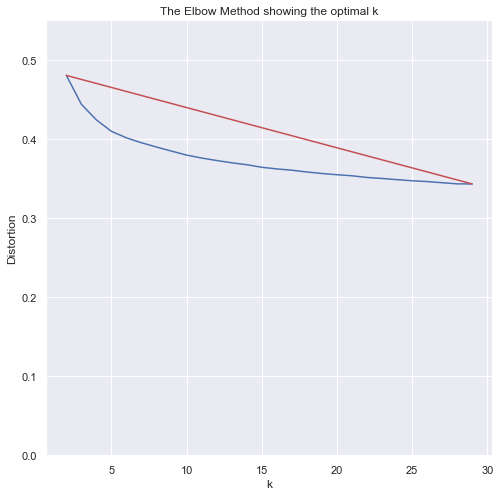

In [1366]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.ylim([0,0.55])
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1367]:
distortions

[0.4804718804469185,
 0.44391817110128784,
 0.42414705285566495,
 0.40972134540590144,
 0.4014479454911628,
 0.39524537305239477,
 0.38985901257308847,
 0.38469324226894097,
 0.37966469275245374,
 0.3759644092086088,
 0.37280995341749606,
 0.3699022360464139,
 0.36753015774805203,
 0.36426582778070166,
 0.36220907250695655,
 0.3605522712722488,
 0.35829904605607177,
 0.35639838067889673,
 0.35486934211959825,
 0.3535188293180319,
 0.3513714551479295,
 0.35014427645559193,
 0.34862504247812465,
 0.3471852444615553,
 0.34623158668056975,
 0.344730248976139,
 0.3432930172578735,
 0.34318027104510096]

In [1375]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
old_data['y'] = y_pred

In [1376]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.to_numpy())

/Users/rishabh/miniforge3/envs/Tensorflow/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rishabh/miniforge3/envs/Tensorflow/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2855 samples in 0.028s...
[t-SNE] Computed neighbors for 2855 samples in 0.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2855
[t-SNE] Computed conditional probabilities for sample 2000 / 2855
[t-SNE] Computed conditional probabilities for sample 2855 / 2855
[t-SNE] Mean sigma: 0.147316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.582657
[t-SNE] KL divergence after 1000 iterations: 1.620319


/Users/rishabh/miniforge3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


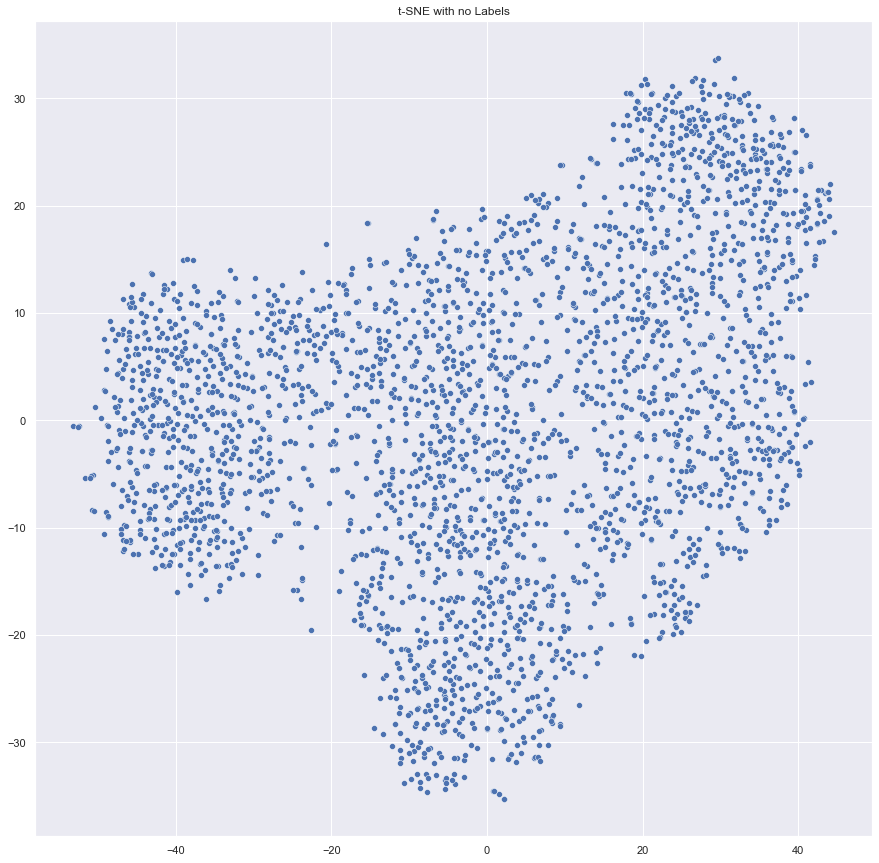

In [1377]:

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

/Users/rishabh/miniforge3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


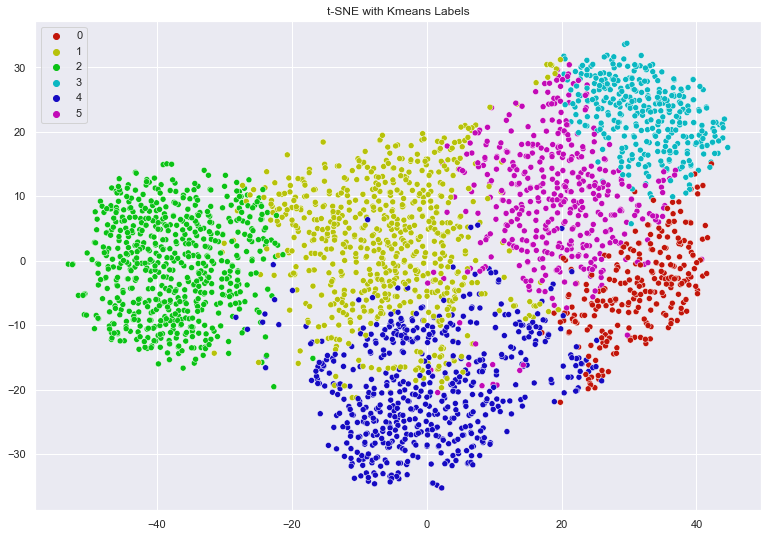

In [1378]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(k, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()



In [1379]:
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap, transform
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.layouts import column, widgetbox, row, layout
from bokeh.layouts import column

In [1380]:
# show on notebook
output_notebook()
# target labels
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    player_name= v2_data['Player Name'],
    att_def = v2_data['Playing_Nature'],
    vert_pos = v2_data['Vertical Position'],
    horizontal_pos = v2_data['Horizontal Position'],
    rating = v2_data['Rating'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Player Name", "@player_name{safe}"),
    ("Player Nature", "@att_def{safe}"),
    ("Vertical Position", "@vert_pos{safe}"),
    ("Horizontal Position", "@horizontal_pos{safe}"),
    ("Rating", "@rating"),
    ("Cluster", "@labels")
],
point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[k],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
plot = figure(plot_width=1200, plot_height=850, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset', 'save', 'tap'], 
           title="Clustering of the Soccer players with t-SNE and K-Means", 
           toolbar_location="above")

# plot settings
plot.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')
plot.legend.background_fill_alpha = 0.6

Loading BokehJS ...

In [1381]:


# LAYOUT OF THE PAGE
l = layout([
    [plot]
])
l.sizing_mode = "scale_both"


# show
output_file('soccer_players_interactive.html')
show(l)

